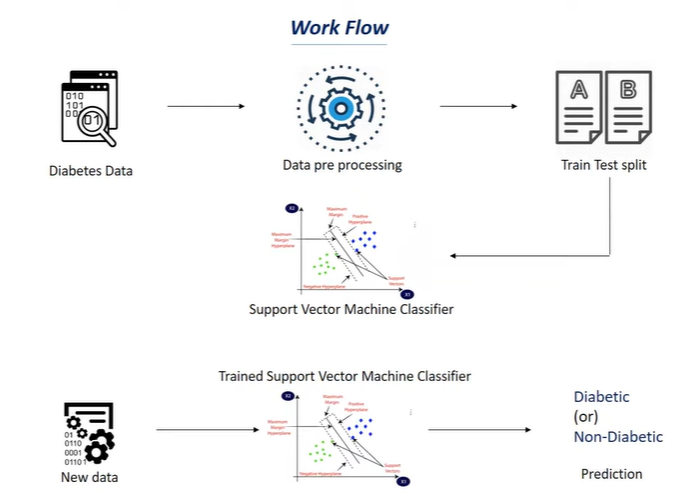

In [1]:
#importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA COLLECTION AND ANALYSIS

In [2]:
#loading the dataset
rawdf = pd.read_csv('dataset/diabetes.csv')
rawdf.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(rawdf.shape,"\n")
print(rawdf.dtypes,"\n")

(768, 9) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object 



In [4]:
#getting the statistical measures of the data
rawdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
rawdf['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
rawdf.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
#seperating data and labels
X = rawdf.drop(columns='Outcome', axis=1)
Y = rawdf['Outcome']

print(X,"\n")
print(Y,"\n")


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


DATA STANDARDIZATION

In [8]:
scaler = StandardScaler()
# scaler.fit(X)
# standardized_data = scaler.transform(X)
standardized_data = scaler.fit_transform(X)

In [9]:
X = standardized_data
#Y is already assigned above

In [10]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4, stratify=Y)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


TRAINING THE MODEL

In [13]:
classifier = svm.SVC(kernel='linear')

#training the svm classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

MODEL EVALUATION

In [14]:
# storing all the prediction in the variable 
X_train_prediction = classifier.predict(X_train)

# ACCURACY SCORE OF TRAINING DATA
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuaracy score of the training data: ", training_data_accuracy *100)

print("NOTE: all odd random state give 78.3 and all even random state give 78,6")

Accuaracy score of the training data:  78.66449511400651
NOTE: all odd random state give 78.3 and all even random state give 78,6


In [15]:
# storing all the prediction in the variable 
X_test_prediction = classifier.predict(X_test)

# ACCURACY SCORE OF TRAINING DATA
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuaracy score of the test data: ", test_data_accuracy *100)


Accuaracy score of the test data:  72.72727272727273


MAKING PREDICTIVE SYSTEM

In [16]:
input_data = (0,137,40,35,168,43.1,2.288,33)

#change this input data to numpy array 
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting one feature
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardized data since the values are not in same dtype
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person is non-diabetic")
else:
  print("The person is diabetic")


[[-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]
[1]
The person is diabetic


d:\config_files\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
